In [1]:
import pandas as pd
import ast
#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_acl = pd.read_csv('df_acl.csv')

In [3]:
df_acl

club_value    weight    height  injury_type  age  \
0        2.639061  2.064700  0.836866            0   24   
1        2.639061  1.316092  0.218810            0   36   
2        2.639061  1.316092  0.218810            0   34   
3        2.639061  1.316092  0.218810            0   33   
4        2.639061  1.316092  0.218810            0   33   
...           ...       ...       ...          ...  ...   
12220   -0.995378 -1.528617 -1.171817            0   22   
12221   -0.995378 -1.528617 -1.171817            0   21   
12222   -0.995378 -0.330845 -1.017303            0   20   
12223   -0.995378 -0.330845 -1.017303            0   19   
12224   -0.995378 -0.330845 -1.017303            0   19   

       role_Defender - Centre-Back  role_Defender - Left-Back  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
12220                            0                          0   
12221                            0                          0   
12222                            0                          0   
12223                            0                          0   
12224                            0                          0   

       role_Defender - Right-Back  role_Forward - Centre-Forward  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
12220                           0                              0   
12221                           0                              0   
12222                           0                              1   
12223                           0                              1   
12224                           0                              1   

       role_Forward - Left Winger  ...  role_Midfielder - Left Midfield  \
0                               0  ...                                0   
1                               0  ...                                0   
2                               0  ...                                0   
3                               0  ...                                0   
4                               0  ...                                0   
...                           ...  ...                              ...   
12220                           0  ...                                0   
12221                           0  ...                                0   
12222                           0  ...                                0   
12223                           0  ...                                0   
12224                           0  ...                                0   

       role_Midfielder - Right Midfield  foot_both  foot_left  foot_right  \
0                                     0          0          1           0   
1                                     0          0          0           1   
2                                     0          0          0           1   
3                                     0          0          0           1   
4                                     0          0          0           1   
...                                 ...        ...        ...         ...   
12220                                 0          0          1           0   
12221                                 0          0          1           0   
12222                                 0          0          0           1   
12223                        

As there are more non-acl than ACL injuries . The data will be undersmapled and oversampled (SMOTE) .

# Undersampling

In [4]:
import numpy as np
import operator
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
import itertools
from collections import Counter
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,\
roc_auc_score,roc_curve,recall_score,precision_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score
import warnings
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Undersampling the data so there are equal number of ACL to Non-ACL injuries by undersampling the Non ACL injuries
# Count the ACL injuries using len function
acl_count = len(df_acl[df_acl['injury_type'] == 1])
print("Number of ACL injuries:", acl_count)


Number of ACL injuries: 263


In [6]:
# Sample an equal number of non-ACL injuries.
non_acl_samples = df_acl[df_acl['injury_type'] == 0].sample(acl_count)
print("Number of sampled non-ACL injuries:", len(non_acl_samples))


Number of sampled non-ACL injuries: 263


In [7]:
#create a new df of the undersampled data
undersampled_df = pd.concat([df_acl[df_acl['injury_type'] == 1], non_acl_samples])
#verifying the samples are equal
print("Percentage of Non ACL: ", len(undersampled_df[undersampled_df['injury_type'] == 0]) / len(undersampled_df))
print("Percentage of ACL: ", len(undersampled_df[undersampled_df['injury_type'] == 1]) / len(undersampled_df))
print("Total number in undersampled data:", len(undersampled_df))


Percentage of Non ACL:  0.5
Percentage of ACL:  0.5
Total number in undersampled data: 526


In [8]:
X = undersampled_df.loc[:, undersampled_df.columns != 'injury_type'].values
y = undersampled_df.loc[:, undersampled_df.columns == 'injury_type'].values.ravel()

##  tSNE
Visualise the undersampled data to see if it is separable
t-SNE is a technique for dimensionality reduction that is well-suited for the visualisation of high-dimensional datasets.Takes a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space (2D in this case)

In [9]:
from sklearn.manifold import TSNE

# Drop the 'injury_type' column as t-SNE is only for the features
X_for_tsne = X

# Apply t-SNE and get a 2D representation
tsne = TSNE(n_components=2, random_state=42)
matrix_2d = tsne.fit_transform(X_for_tsne)

# Prepare df for vis
df_tsne = pd.DataFrame(matrix_2d).reset_index(drop=True)
undersampled_df = undersampled_df.reset_index(drop=True)

# Add 'injury_type' and 'color' Columns
df_tsne['injury_type'] = undersampled_df['injury_type']
df_tsne['color'] = ['G' if i==0 else 'R' for i in df_tsne['injury_type']]


# Rename and reorder the columns
df_tsne.columns = ['x', 'y', 'injury_type', 'color']

cols = ['injury_type', 'color', 'x', 'y']
df_tsne = df_tsne[cols]
df_tsne.head()


injury_type color          x          y
0            1     R -19.941578  -2.719577
1            1     R -21.046679  -1.166544
2            1     R  -0.959148 -18.802748
3            1     R  -0.187618  23.422070
4            1     R -29.854376  25.521597

In [10]:
# number of rows and columns
df_tsne.shape

(526, 4)

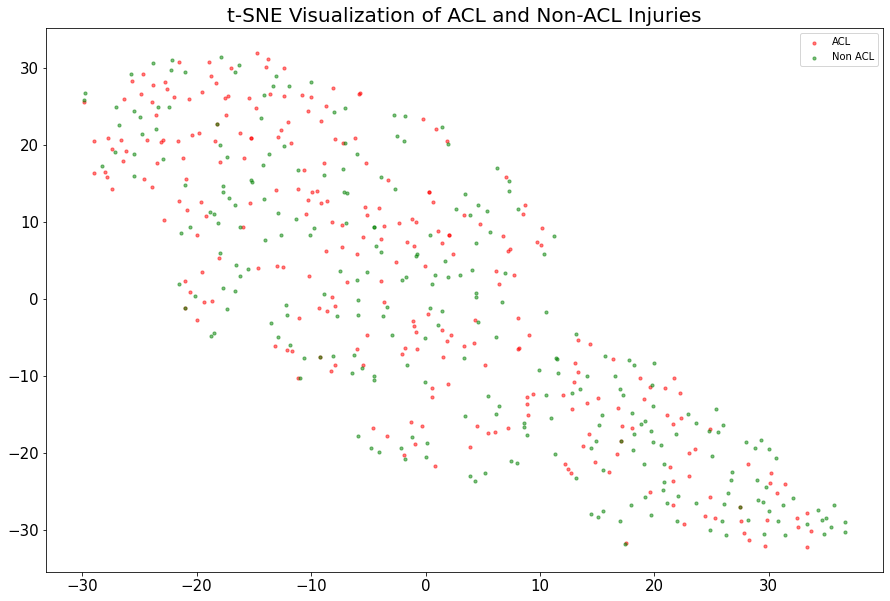

In [11]:
#Visualise the data
fig, ax = plt.subplots(figsize=(15,10))

# Adding the title
ax.set_title('t-SNE Visualization of ACL and Non-ACL Injuries', fontsize=20)

# Plot ACL injuries
ax.scatter(df_tsne[df_tsne['injury_type']==1].x.values, df_tsne[df_tsne['injury_type']==1].y.values,
           c='red', s=10, alpha=0.5, label='ACL')

# Plot Non-ACL injuries
ax.scatter(df_tsne[df_tsne['injury_type']==0].x.values, df_tsne[df_tsne['injury_type']==0].y.values,
           c='green', s=10, alpha=0.5, label='Non ACL')

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=15)

# Add legend
ax.legend()

# Show the plot
plt.show();


The x and y coordinates themselves don't carry a particular meaning, but their relative positions do.
Points that are close to each other in the t-SNE plot are similar in terms of their features in the high-dimensional data.
Points that are far from each other in the t-SNE plot are dissimilar.

# Random forest

## Undersampled data and RFR

In [12]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=np.random.randint(100))

In [13]:
# Dictionaries to store CV scores and OOB errors for different tree numbers
scores_dict = {num_trees:[] for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
oob_err_dict = {num_trees:0 for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}

#Number of folds for cross validation
k = 10

# Start a loop over the num of trees 
for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int):
    warnings.filterwarnings("ignore")
    # RFR classifier and num of trees , Max depht is depht of each tree , OOB score enabled
    clf = RandomForestClassifier(n_estimators=num_trees, n_jobs=-1, max_depth=10, oob_score=True)
    
    #K folds cross validation on training data, accuracy scores for each fold stored in scores
    scores = cross_val_score(clf, X_train, y_train, cv=k, n_jobs=-1)
   
    #Fit the model on the training data
    model = clf.fit(X_train, y_train)
    
    #Predict on the test data
    preds = model.predict(X_test)
    
    #Evaulation Metrics
    #Calculate precision, recall, and F1-score for the predictions on test data
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    #current number of trees (num_trees), append the average cross-validation accuracy, precision, recall, and F1-score to the scores_dict.
    scores_dict[num_trees].append([scores.mean(), precision, recall, f1])
    
    #Calculate the out-of-bag (OOB) error for the current model.
    temp_oob = 1 - clf.oob_score_
    oob_err_dict[num_trees] = temp_oob

In [14]:
# Print the evaluation metrics
print(f"For num_trees = {num_trees}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

For num_trees = 3006, Precision: 0.6046511627906976, Recall: 0.52, F1-Score: 0.5591397849462365


In [15]:

print(f"For num_trees = {num_trees}, OOB Error: {temp_oob}")


For num_trees = 3006, OOB Error: 0.4452380952380952


An Out-of-Bag (OOB) error of approximately 0.45 (or 45%) suggests that the model on the undersampled data has room for improvement.

### OOB

The term "OOB" stands for "Out-of-Bag," and it is a technique used to evaluate the performance of a Random Forest model.OOB can also be helpful in scenarios where the dataset is imbalanced. You can get an idea of how well the model is generalizing to the minority class.OOB error is an unbiased estimate of the test set error. A lower OOB error means the model is likely to perform well on unseen data.

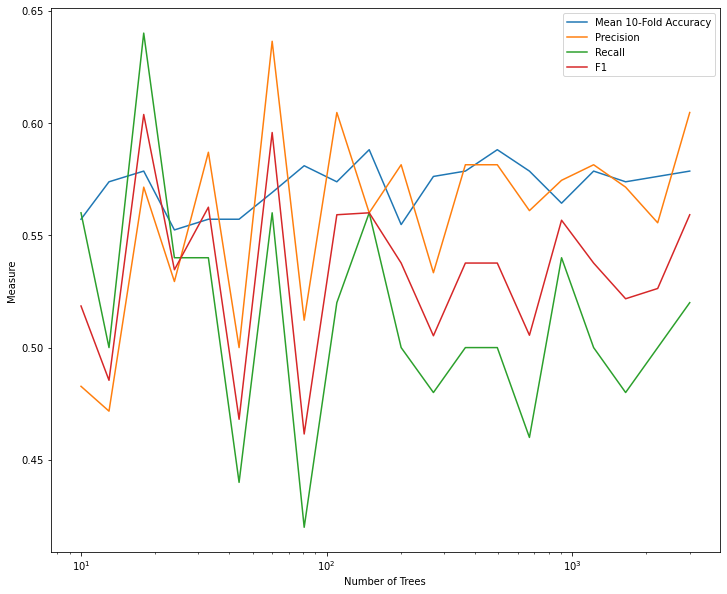

In [16]:
#Visualise performance metrics
#Create fig
fig, ax = plt.subplots(figsize=(12,10))

#Plot mean 10-fold accuracy
ax.semilogx(list(scores_dict.keys()),[elem[0][0] for elem in scores_dict.values()], '-', label='Mean 10-Fold Accuracy')

#Plot Precision for each number of trees
ax.semilogx(list(scores_dict.keys()),[elem[0][1] for elem in scores_dict.values()], '-', label='Precision')

# Plot recall for each number of trees
ax.semilogx(list(scores_dict.keys()),[elem[0][2] for elem in scores_dict.values()], '-', label='Recall')

#Plot recall for each number of trees
ax.semilogx(list(scores_dict.keys()),[elem[0][3] for elem in scores_dict.values()], '-', label='F1')

# Plot
ax.legend()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Measure')
# ax.set_ylim(0.89,1.)
plt.show()

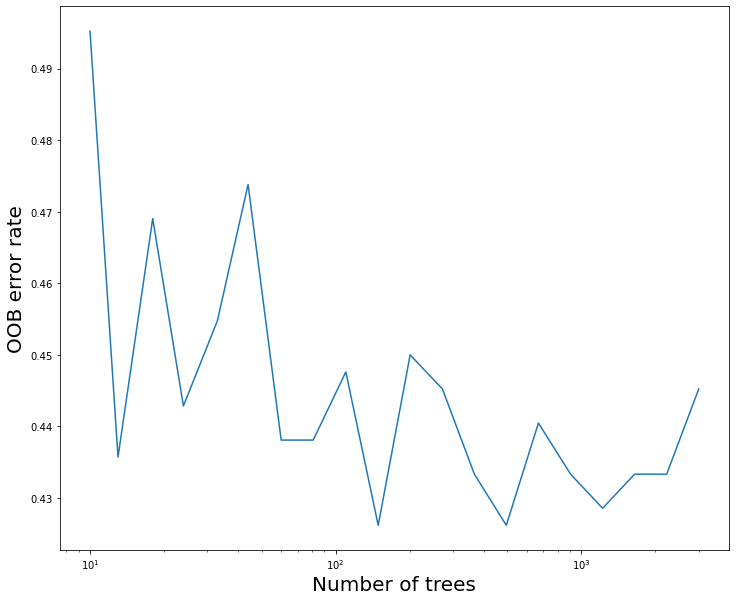

In [17]:
#Plot OOB error rate v  Num of Trees in RFR Model
fig, ax = plt.subplots(figsize=(12,10))

# Plot on log scale
ax.semilogx(list(oob_err_dict.keys()), list(oob_err_dict.values()))
ax.set_xlabel('Number of trees', fontsize=20)
ax.set_ylabel('OOB error rate', fontsize=20)
plt.show()

In [18]:
# Train RFR model

#Num of trees
N_trees = 1000

# n_jons=use all available processors , max depht of any tree =10 , entropy = measure quality of split
clf = RandomForestClassifier(n_estimators=N_trees, n_jobs=-1, max_depth=10, criterion='entropy')

#Fit the model on train data
model = clf.fit(X_train, y_train)

# Predict using the trained model on the test data
preds = model.predict(X_test)

In [19]:
#function to plot confusion matrix(cm)
def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues, norm=False):
    """
    This function prints and plots the confusion matrix
    """
    fig, ax = plt.subplots(figsize=(12,8))
    
    if norm == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round_(cm, decimals=3)
    
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    
    #ticks based on classes
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    # threshold for colour matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #Plot the cm
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.grid(False)
    plt.show()

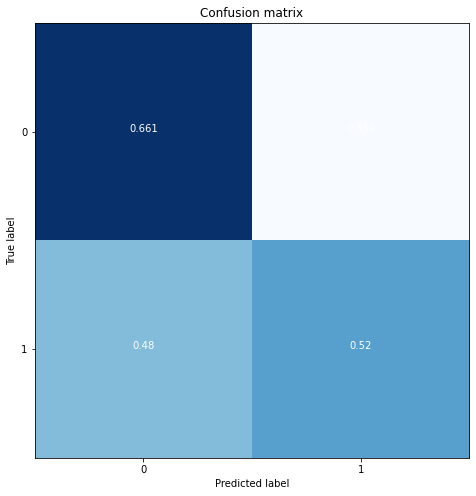

In [20]:
cnf_matrix = confusion_matrix(y_test,model.predict(X_test))
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix', norm=True)

Model is predicting:
true postive 78% of the time 
False postive 22% of the time
False Negative 37.5 % of the time
True postive 62.5 % of the time


In [21]:
print("Recall:", cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0]))
print("Precision:", cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1]))

Recall: 0.52
Precision: 0.5777777777777777


classifier predicts a positive outcome, it is correct 58.92% of the time. 



 ### AUROC Curve

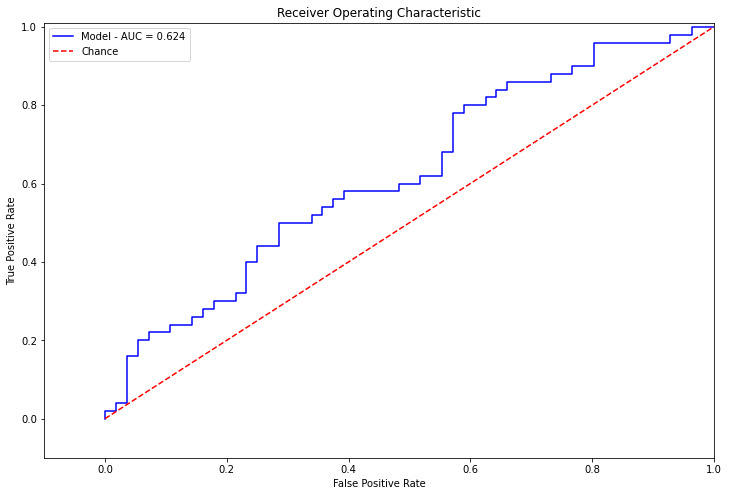

In [22]:
y_prob = clf.predict_proba(X_test)

pos_probs = [y_prob[i][1] for i in range(len(y_prob))]
    
fpr, tpr, threshold = roc_curve(y_test, pos_probs)
auc = roc_auc_score(y_test, pos_probs)

# Plot ROC
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='Model - AUC = %0.3f'% auc)
ax.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--', label='Chance')
ax.legend()
ax.set_xlim([-0.1,1.0])
ax.set_ylim([-0.1,1.01])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.show()

This shows the tradeoff in changing the threshold  , noticeable incerease at two before dropping off again . Perfect trade off is 1:1

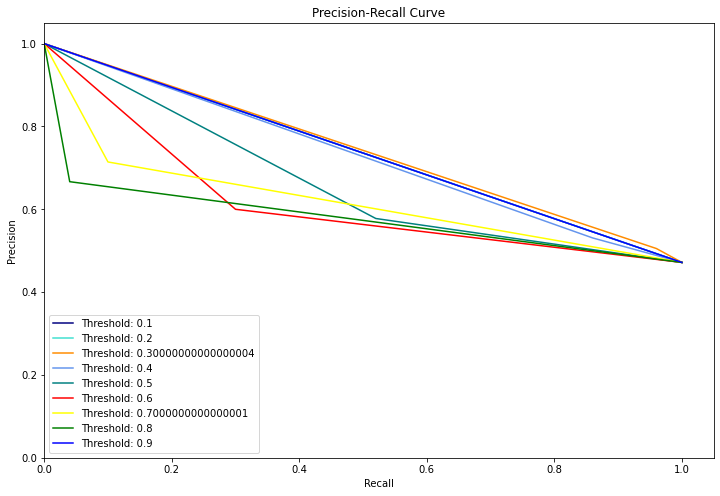

In [23]:
#Plot prediction scores

# predicted probabilities on test data
y_prob = model.predict_proba(X_test)

# define spaces for the 9 lines
thresholds = np.linspace(start=0.1,stop=0.9,num=9)
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black']

plt.figure(figsize=(12,8))

for i,color in zip(thresholds,colors):
    # boolean values if the probability of a ACl classification is above the threshold
    y_bool = y_prob[:,1] > i
    
    #Calculate precision and recall values 
    precision, recall, thresholds = precision_recall_curve(y_test, y_bool)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
plt.show()

Overall the undersampled data did not perform well .

# Smote -Over sampling
Synthetic Minority Over-sampling Technique : Increases the number of cases in a balanced way (creates new synthetic examples in the sample). It helps to solve the imbalance problem for classification datasets.Increased samples of the minority class can improve the performance metrics of classification algorithms.

It can be at risk of overfitting and over generalisation , aswell as increasing noise.

In [24]:
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE


# Splitting the features and target variable
X = df_acl.drop('injury_type', axis=1)
y = df_acl['injury_type']

# Applying SMOTE to generate synthetic samples
smote = SMOTE(sampling_strategy='auto', random_state=42)
#Features after SMOTE has been applied
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating the oversampled df
oversampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Verifying the samples are equal
print("Percentage of Non ACL: ", len(oversampled_df[oversampled_df['injury_type'] == 0]) / len(oversampled_df))
print("Percentage of ACL: ", len(oversampled_df[oversampled_df['injury_type'] == 1]) / len(oversampled_df))
print("Total number in oversampled data:", len(oversampled_df))

Percentage of Non ACL:  0.5
Percentage of ACL:  0.5
Total number in oversampled data: 23924


There is now equal number of acl injuries as non acl injuries . 

In [25]:
# Save to CSV
oversampled_df.to_csv("oversampled_data.csv", index=False)

Applying t-Distributed Stochastic Neighbor Embedding (t-SNE) to the oversampled dataset to reduce its dimensionality to 2d(Visualisation purposes)

In [26]:
# Get t-SNE embeddings for the oversampled dataset(make 2d)
X_resampled_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_resampled)

# Create a DataFrame from t-SNE embeddings
oversampled_df_tsne = pd.DataFrame(X_resampled_tsne, columns=['x', 'y'])

# Adding 'injury_type' from the oversampled DataFrame
oversampled_df_tsne['injury_type'] = y_resampled

# adding colour column for visualisation
#Green for Non-ACL(0),Red for ACL injuries(1)
oversampled_df_tsne['color'] = ['G' if i == 0 else 'R' for i in oversampled_df_tsne['injury_type']]

# Re-ordering cols for readability
cols = ['injury_type', 'color', 'x', 'y']
oversampled_df_tsne = oversampled_df_tsne[cols]

In [27]:
# Display the head of the DataFrame
print(oversampled_df_tsne.head())
print(oversampled_df_tsne.shape)

   injury_type color          x          y
0            0     G  91.095146 -17.831236
1            0     G  27.793018 -80.878227
2            0     G  38.426014 -65.108284
3            0     G  38.377903 -65.025063
4            0     G  38.377903 -65.025063
(23924, 4)


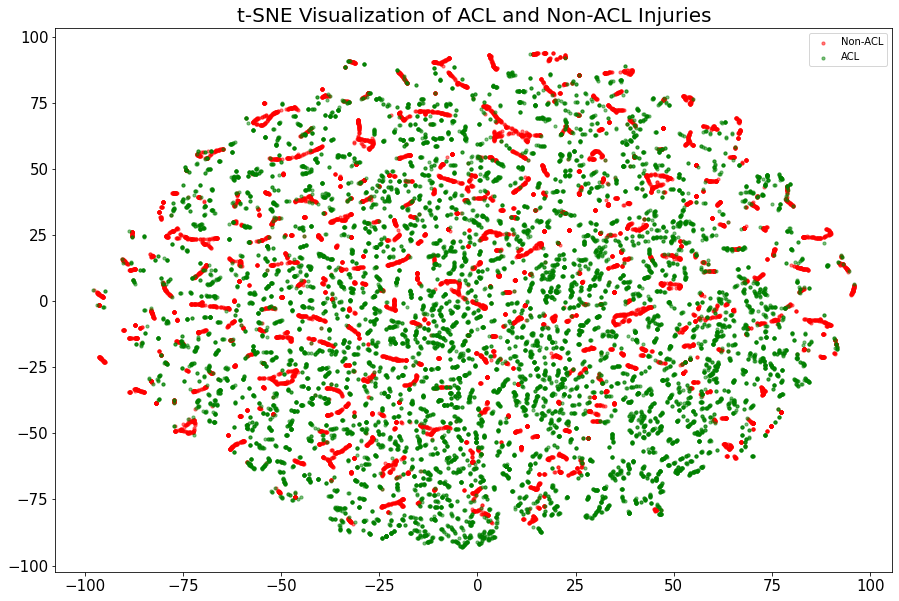

In [28]:
#visualising the 2d tSNE
#Create the plot
fig, ax = plt.subplots(figsize=(15,10))

#scatter plot for non-acl
ax.scatter(oversampled_df_tsne[oversampled_df_tsne['injury_type']==1].x.values, oversampled_df_tsne[oversampled_df_tsne['injury_type']==1].y.values,
           c='red', s=10, alpha=0.5, label='Non-ACL')
# c='red'= colour of the markers to red.
# s=10  size of markers to 10.
#alpha=0.5 sets the transparency level to 0.5.
#label='Non-ACL' sets the label for the legend

#scatter plot for acl injuries
ax.scatter(oversampled_df_tsne[oversampled_df_tsne['injury_type']==0].x.values, oversampled_df_tsne[oversampled_df_tsne['injury_type']==0].y.values,
           c='green', s=10, alpha=0.5, label='ACL')

#customise ticks
ax.tick_params(axis='both', which='major', labelsize=15)
# title
ax.set_title('t-SNE Visualization of ACL and Non-ACL Injuries', fontsize=20)
ax.legend()
plt.show();

In [29]:
# regions not really well defined on oversampled smote data,appear in groups , KNN better ??

# RFR on SMOTE

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
# Split the oversampled data into training and testing sets
# Using random_state from a random integer to add some randomness
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=np.random.randint(100))


In [32]:
#Create empty dictionary to store the OOB errors for each num of trees
# np.logspace generates numbers that are evenly spaced on a log scale
oob_err_dict = {num_trees:0 for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}

# Loop through each number of trees
for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int):
    
    # Initialize a Random Forest Classifier with a given number of trees
    # n_jobs = -1 allows using all available CPU cores
    # max_depth is set to limit the maximum depth of the trees
    # oob_score = True enables the computation of OOB error
    clf = RandomForestClassifier(n_estimators=num_trees, n_jobs=-1, max_depth=10, oob_score=True)
    
     # Fit the model to the training data
    model = clf.fit(X_train, y_train)
    
    # Compute the OOB error (1 - oob_score_)
    # oob_score_ attribute in sklearn gives the OOB score which is an estimate of accuracy
    # OOB error is 1 - OOB score
    temp_oob = 1 - clf.oob_score_
    
    # Store the OOB error in the dictionary
    oob_err_dict[num_trees] = temp_oob
    print("trained with:",num_trees,"trees")

trained with: 10 trees
trained with: 13 trees
trained with: 18 trees
trained with: 24 trees
trained with: 33 trees
trained with: 44 trees
trained with: 60 trees
trained with: 81 trees
trained with: 110 trees
trained with: 149 trees
trained with: 201 trees
trained with: 272 trees
trained with: 367 trees
trained with: 495 trees
trained with: 669 trees
trained with: 904 trees
trained with: 1221 trees
trained with: 1648 trees
trained with: 2226 trees
trained with: 3006 trees


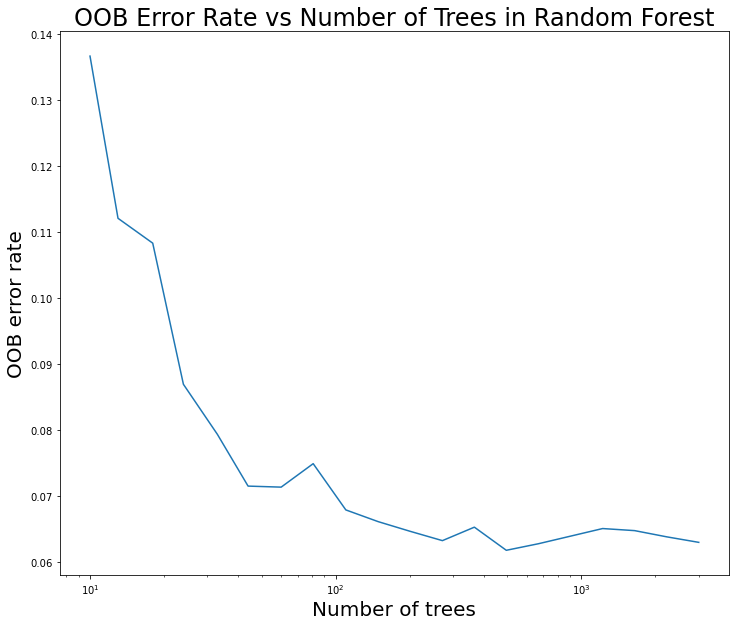

In [33]:
# Initialize a plot with width=12, height=10
fig, ax = plt.subplots(figsize=(12,10))

# Plot the OOB error rates on a semilogarithmic scale
# The x-values are the number of trees (in log scale) and y-values are the OOB error rates
ax.semilogx(list(oob_err_dict.keys()), list(oob_err_dict.values()))

# Add labels for the x-axis and y-axis, setting the font size to 20
ax.set_xlabel('Number of trees', fontsize=20)
ax.set_ylabel('OOB error rate', fontsize=20)

# Add a title 
ax.set_title('OOB Error Rate vs Number of Trees in Random Forest', fontsize=24)

# Display the plot
plt.show()


In [34]:
# optimal number approx 1000

In [35]:
# number of trees in RFR
N_trees = 1000 

# n_estimators=N_trees = 1000 trees in the forest
# n_jobs=-1 enables the use of all processors for faster computation
# max_depth=10 sets the maximum depth of each decision tree to 10
clf = RandomForestClassifier(n_estimators=N_trees, n_jobs=-1, max_depth=10) 

# Train the Random Forest Classifier on the training data
# X_train is the feature matrix for the training data
# y_train is the target variable for the training data
model = clf.fit(X_train, y_train) 


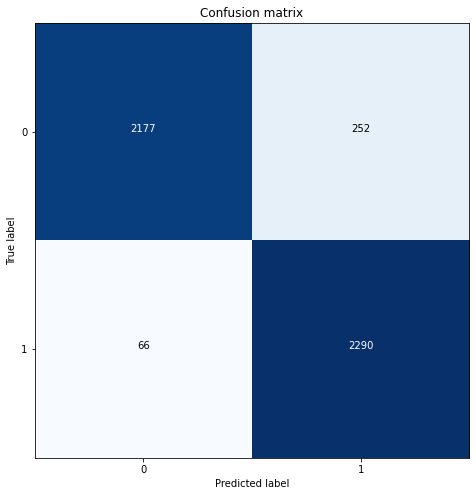

In [36]:
# confusion matrix by comparing the true labels (y_test) and the predicted labels (model.predict(X_test))
cnf_matrix = confusion_matrix(y_test, model.predict(X_test))

# Define the class names for the confusion matrix
class_names = [0, 1]

# plot the matrix
# 'cnf_matrix' is the matrix data to be plotted
# 'classes' is the list of class labels to be shown on the matrix
# 'title' sets the title for the plot
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')


In [37]:
# Recall is calculated as True Positives / (True Positives + False Negatives)
#cnf_matrix[1][1] is True Positives and cnf_matrix[1][0] is False Negatives.
print("Recall:", cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0]))

# Precision is calculated as True Positives / (True Positives + False Positives)
# cnf_matrix[1][1] is True Positives and cnf_matrix[0][1] is False Positives.
print("Precision:", cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1]))

Recall: 0.9719864176570459
Precision: 0.9008654602675059


97.21% of the actual positive instances have been identified correctly by the model. 90.87% of the positive instances predicted by the model actually turn out to be positive. 
This would suggest the model is accurate in its predictions

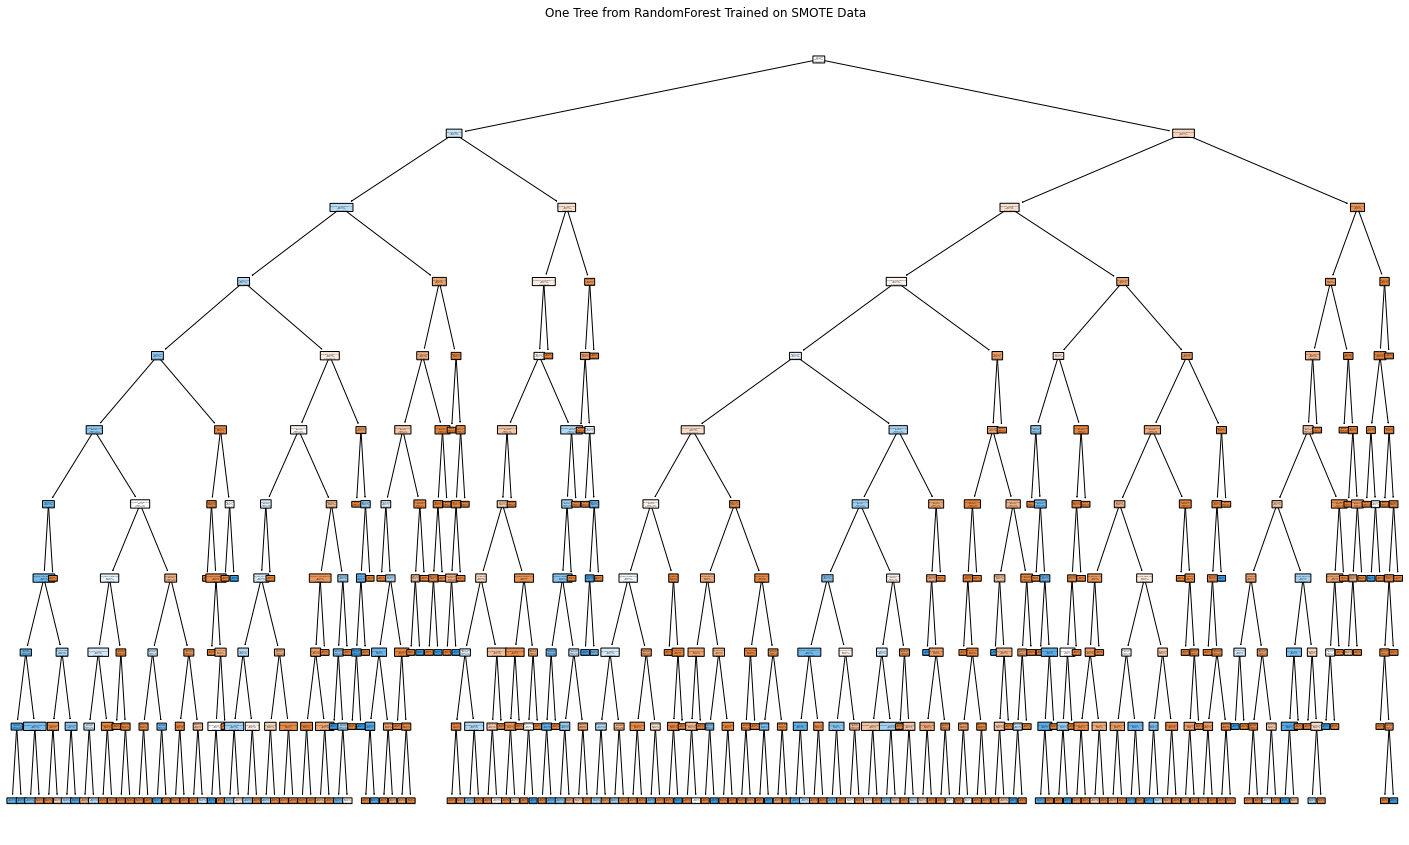

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot a single tree from the previously trained forest
plt.figure(figsize=(25, 15))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)

# Add title and labels
plt.title("One Tree from RandomForest Trained on SMOTE Data")
plt.xlabel("Features")
plt.ylabel("Classes")

plt.show()


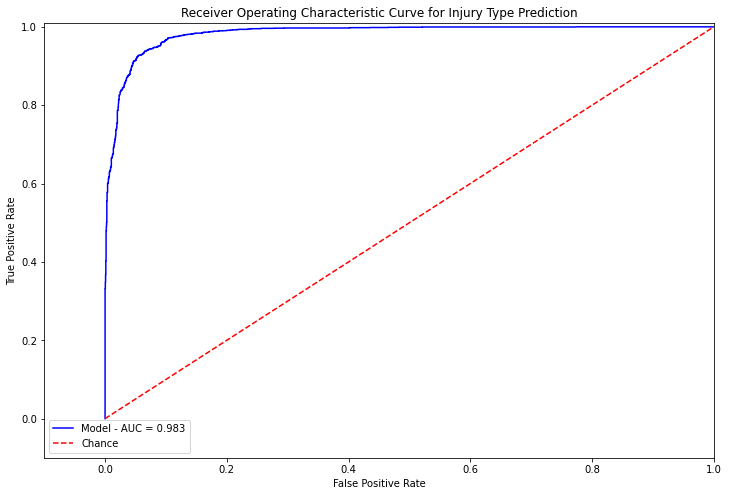

In [39]:
# predicted probabilities from the Random Forest Classifier
y_prob = clf.predict_proba(X_test)

#  probabilities of the positive class (label=1)
pos_probs = [y_prob[i][1] for i in range(len(y_prob))]
    
# false positive rate, true positive rate, and threshold using the ROC curve function
fpr, tpr, threshold = roc_curve(y_test, pos_probs)

# Area Under the Curve (AUC) for the ROC curve
auc = roc_auc_score(y_test, pos_probs)

# Initialise the plot
fig, ax = plt.subplots(figsize=(12,8))

# title
ax.set_title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, 'b',label='Model - AUC = %0.3f'% auc)

# Add AUC as a legend
ax.legend(loc='lower right')

# Plot the diagonal red dashed line, representing the "chance" classifier
plt.plot([0,1],[0,1],'r--', label='Chance')

# Add legend for the "chance" line
ax.legend()

# Set the limits for the axes
ax.set_xlim([-0.1,1.0])
ax.set_ylim([-0.1,1.01])

# Set the labels for the axes
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')

# Add a title to the plot
ax.set_title('Receiver Operating Characteristic Curve for Injury Type Prediction')

# Display the plot
plt.show()


The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier as the discrimination threshold changes.AUC (Area Under the Curve) score close to 1 indicates that the model has excellent class-discriminatory capabilities. AUC is one of the most robust metrics for classification problems as it is not sensitive to class imbalance.AUC score of 0.976 means that there is a 97.6% chance that the model will be able to distinguish between a positive and a negative instance correctly.red dashed line at 45 degrees represents a no-skill classifier (chance), which has an AUC of 0.5. The model is far above this, indicating it has learned patterns from the training data very effectively.

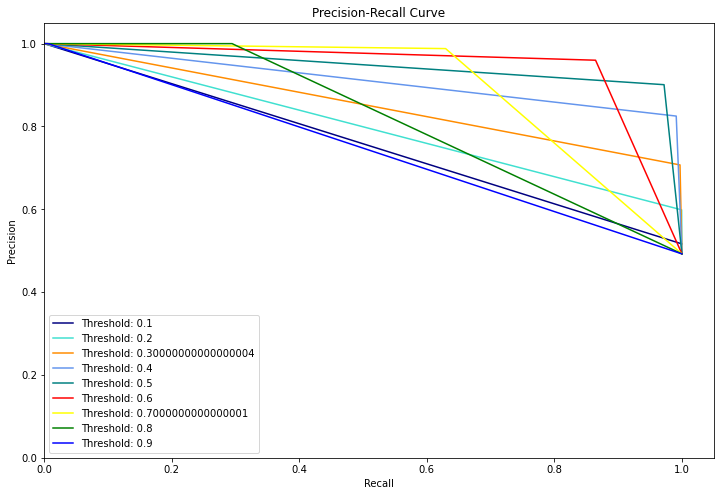

In [40]:
# Get the predicted probabilities from the trained model
y_prob = model.predict_proba(X_test)

# Define a set of thresholds to evaluate
thresholds = np.linspace(start=0.1, stop=0.9, num=9)
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black']

# Initialize the plot
plt.figure(figsize=(12,8))

# Loop through each threshold value to plot its Precision-Recall curve
for i, color in zip(thresholds, colors):
    # Create a boolean array: True if the probability of a positive class is above the current threshold
    y_bool = y_prob[:,1] > i
    
    # Calculate the precision, recall values based on the boolean array
    precision, recall, _ = precision_recall_curve(y_test, y_bool)
    
    # Plot Precision-Recall curve for the current threshold
    plt.plot(recall, precision, color=color, label='Threshold: %s' % i)
    
# Add labels, title, and legend to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Show the plot
plt.show()


In [ ]:
# create a df to models accuracies
columns = ['Model', 'Recall', 'Precision', 'AUC-ROC']
model_performance_df = pd.DataFrame(columns=columns)

In [ ]:
# Append to DataFrame
new_row = {'Model':'Random Forest Classifier', 'Recall':recall, 'Precision':precision, 'AUC-ROC':auc}
model_performance_df = model_performance_df.append(new_row, ignore_index=True)

In [41]:
# more accurate with oversampled data 
#print comparison

## Feature importance:

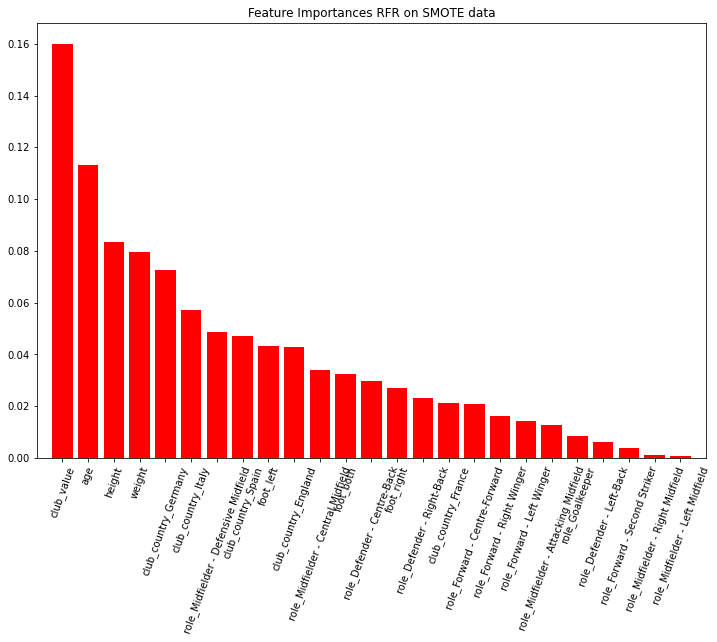

In [42]:
# Plotting feature importances
# Retrieve the feature importances from the trained RandomForest model
importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(12,8))

# Set the title for the plot
ax.set_title('Feature Importances RFR on SMOTE data')

# Create a bar chart of feature importances
plt.bar(range(X_train.shape[1]), importances[indices], color='r', align='center')

# Label the x-axis with feature names, rotated for better visibility
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels([list(X.columns)[i] for i in indices], rotation=70)

# Limit the x-axis to the number of features
ax.set_xlim([-1, X_train.shape[1]])

# Show the plot
plt.show()


# Decsion tree SMOTE

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [44]:
# Seperate features and labels
X = oversampled_df.drop(columns=['injury_type'])
y = oversampled_df['injury_type']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on training data
train_preds = clf.predict(X_train)

# Predict on test data
y_pred = clf.predict(X_test)

In [45]:
# Compute the accuracy on the training data
train_accuracy = accuracy_score(y_train, train_preds)

# Compute the accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9952627765702502
Testing Accuracy: 0.9730814245109514
Accuracy: 0.9730814245109514
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2997
           1       0.98      0.97      0.97      2984

    accuracy                           0.97      5981
   macro avg       0.97      0.97      0.97      5981
weighted avg       0.97      0.97      0.97      5981



The high precision and recall values indicate that the model is performing exceptionally well on both the majority and minority classes. This is also backed by the high F1-score. The model is tested on a balanced dataset (SMOTE), which gives more confidence that the high metrics are reflective of a model that generalizes well, rather than one that is merely good at predicting the majority class.
Decision tree model has performed quite well on the test data, it's almost perfect on the training data. The model is likely overfitting to the training data to some extent, even though the test accuracy is also quite high.

In [46]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
# Print precision and recall
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Print the confusion matrix
print("Confusion Matrix:")
print(cnf_matrix)

# Print Classification Report for additional details
print("Classification Report:")
print(classification_report(y_test, y_pred))

Precision: [0.492372 1.       1.      ]
Recall: [1.         0.00594228 0.        ]
Confusion Matrix:
[[2924   73]
 [  88 2896]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2997
           1       0.98      0.97      0.97      2984

    accuracy                           0.97      5981
   macro avg       0.97      0.97      0.97      5981
weighted avg       0.97      0.97      0.97      5981



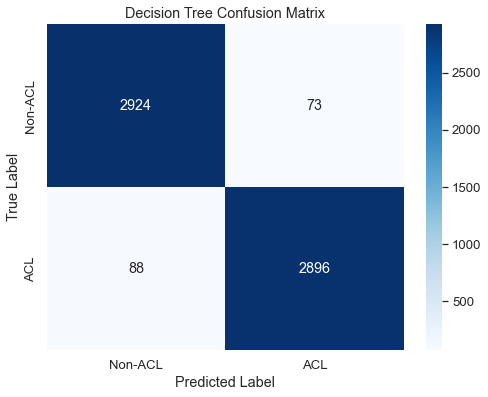

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Non-ACL', 'ACL']  # you can change these as per your labels

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


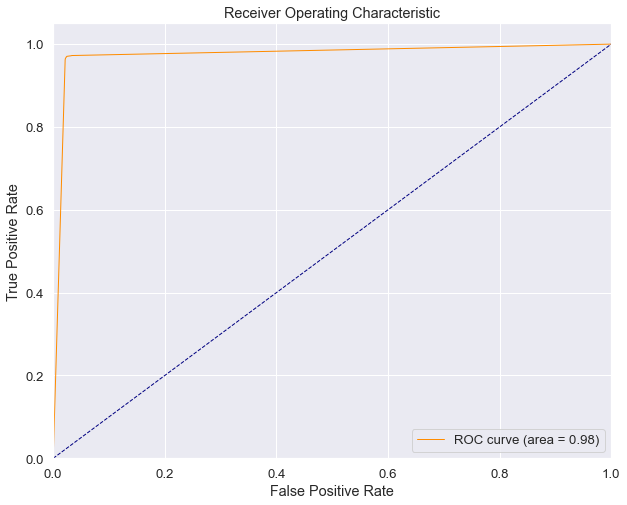

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the probabilities of class 1
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area-Under-Curve) Score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



In [50]:
# Get feature importances
importances = clf.feature_importances_

# Print feature importances
for i, imp in enumerate(importances):
    print(f'Feature {i}: {imp}')

Feature 0: 0.19807864191171226
Feature 1: 0.11733385063188458
Feature 2: 0.11218043463808976
Feature 3: 0.1167575736309453
Feature 4: 0.019829037978505725
Feature 5: 0.009122461998639812
Feature 6: 0.019557004429328662
Feature 7: 0.019139800158853977
Feature 8: 0.007826728889038003
Feature 9: 0.009447723135885478
Feature 10: 0.0013075840311653046
Feature 11: 0.01260201439248155
Feature 12: 0.00945692414820908
Feature 13: 0.01887785705809133
Feature 14: 0.01850676053507436
Feature 15: 0.0041541453488261855
Feature 16: 0.001409673133621272
Feature 17: 0.016831933479435075
Feature 18: 0.025711134082993276
Feature 19: 0.021819290937538816
Feature 20: 0.06112485437941531
Feature 21: 0.05361198700926462
Feature 22: 0.03920623312997313
Feature 23: 0.048184550248411444
Feature 24: 0.037921800682615664


In [51]:
import matplotlib.pyplot as plt


# Create a pandas Series with feature importances and sort it
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

print(feature_imp)

club_value                              0.198079
weight                                  0.117334
age                                     0.116758
height                                  0.112180
club_country_England                    0.061125
club_country_France                     0.053612
club_country_Italy                      0.048185
club_country_Germany                    0.039206
club_country_Spain                      0.037922
foot_left                               0.025711
foot_right                              0.021819
role_Defender - Centre-Back             0.019829
role_Defender - Right-Back              0.019557
role_Forward - Centre-Forward           0.019140
role_Midfielder - Central Midfield      0.018878
role_Midfielder - Defensive Midfield    0.018507
foot_both                               0.016832
role_Goalkeeper                         0.012602
role_Midfielder - Attacking Midfield    0.009457
role_Forward - Right Winger             0.009448
role_Defender - Left

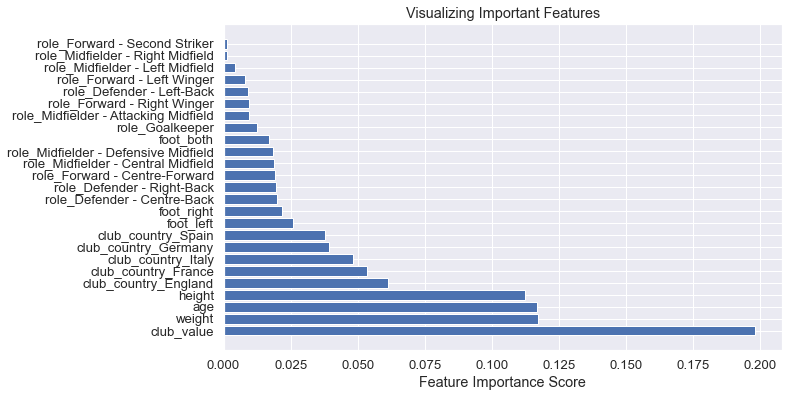

In [52]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_imp.index, feature_imp)
plt.xlabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

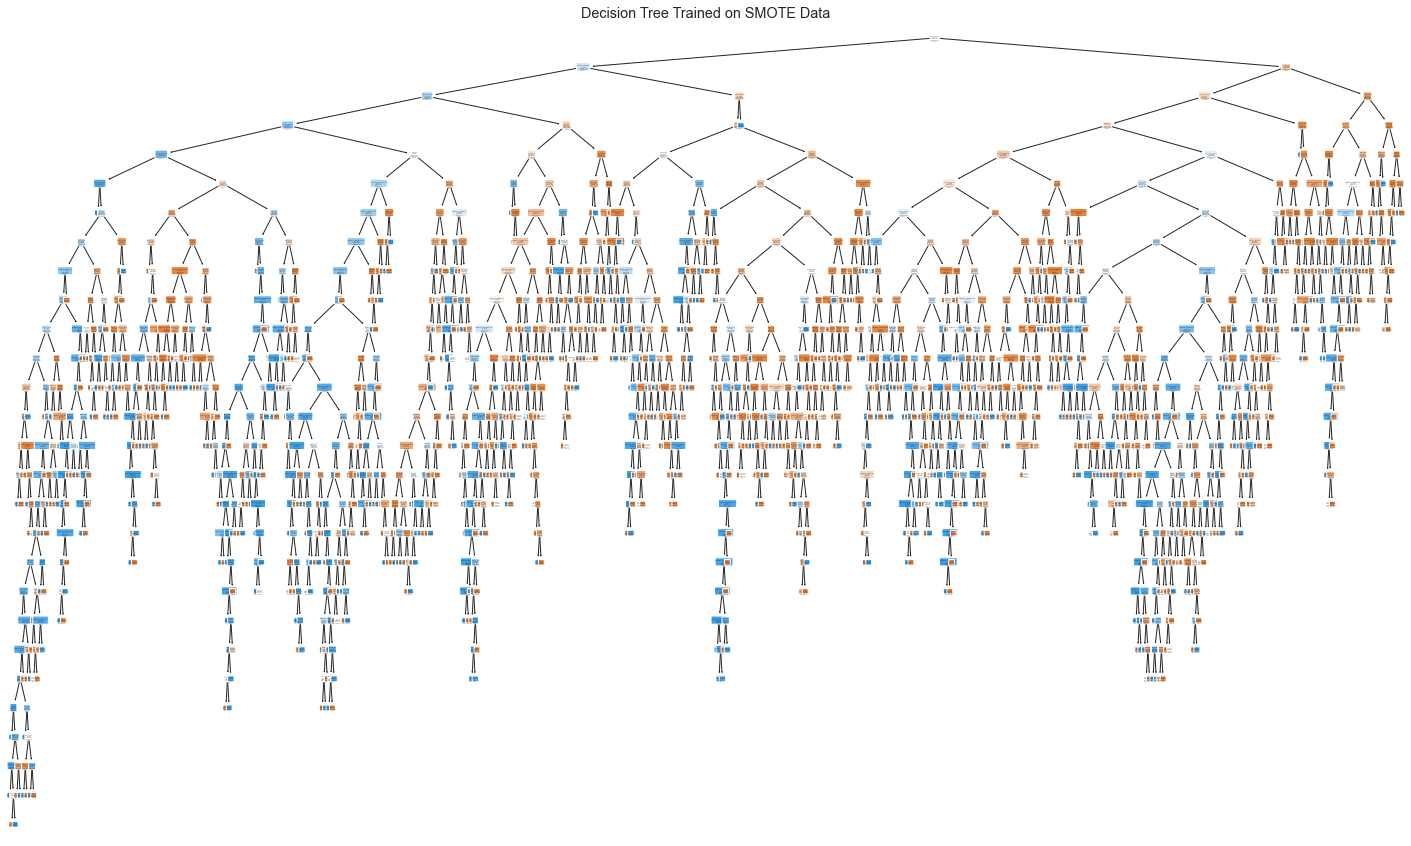

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define plot size
plt.figure(figsize=(25, 15))

# Plot the trained decision tree
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)

# Add a title
plt.title('Decision Tree Trained on SMOTE Data')

# Add axis labels (optional)
plt.xlabel('Features')
plt.ylabel('Classes')


# Show the plot
plt.show()

# KNN on Smote

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Seperate features and labels
X = oversampled_df.drop(columns=['injury_type'])
y = oversampled_df['injury_type']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
# Initialize k-NN Classifier with k=5 (you can adjust 'n_neighbors' as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on training data
train_preds = knn.predict(X_train)

# Predict on test data
y_pred = knn.predict(X_test)

In [56]:
# Compute the accuracy on the training data
train_accuracy = accuracy_score(y_train, train_preds)

# Compute the accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9647773504988018
Testing Accuracy: 0.9446580839324528
Accuracy: 0.9446580839324528
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      2997
           1       0.91      0.99      0.95      2984

    accuracy                           0.94      5981
   macro avg       0.95      0.94      0.94      5981
weighted avg       0.95      0.94      0.94      5981



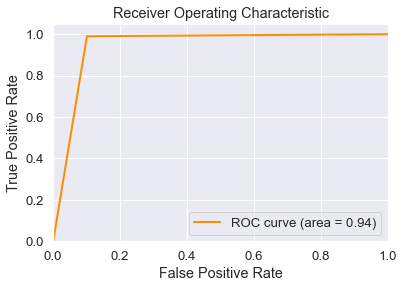

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## PR curve

Text(0.5, 1.0, '2-class Precision-Recall curve')

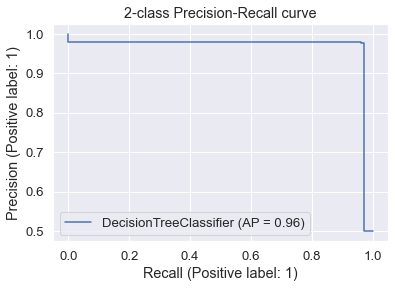

In [58]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')


An ROC AUC of 0.94 is very good, indicating that the model has a high ability to distinguish between the positive and negative classes.
A PR AUC of 0.96 is also excellent, indicating that the model has both high recall and high precision.all

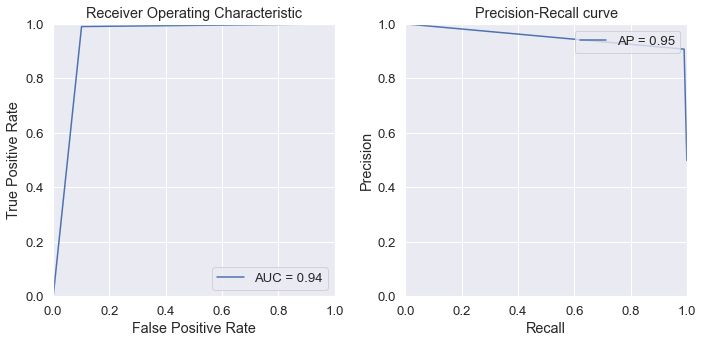

In [59]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.title('Precision-Recall curve')
plt.plot(recall, precision, 'b', label = 'AP = %0.2f' % pr_auc)
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.tight_layout()
plt.show()


### Confusion Matrix

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

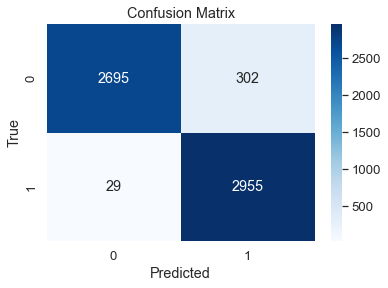

In [61]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [62]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run the model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)

fig.show()

# Seperate features and labels
X = oversampled_df.drop(columns=['injury_type'])
y = oversampled_df['injury_type']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Initialize k-NN Classifier with k=5 (you can adjust 'n_neighbors' as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on training data
train_preds = knn.predict(X_train)

# Predict on test data
y_pred = knn.predict(X_test)
